<a href="https://colab.research.google.com/github/brendanpshea/database_sql/blob/main/Database_05_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Database Design
### Database and SQL Through Pop Culture | Brendan Shea, PhD

Welcome to the exciting world of database design! In this chapter, we'll embark on a journey through the process of creating a database from scratch. We'll begin with the conceptual modeling phase, where we'll identify the key entities, attributes, and relationships in our spy academy database. From there, we'll move on to logical modeling, where we'll learn about the importance of keys, normalization, and join tables in ensuring data integrity and avoiding redundancy. Finally, we'll roll up our sleeves and dive into physical modeling, where we'll use SQL statements to actually create, modify, and delete tables in our database. Throughout this chapter, we'll use the spy academy scenario to provide concrete examples and bring the concepts to life. By the end of this chapter, you'll have a solid understanding of how to design and implement a database that can handle even the most covert operations. So, let's put on our secret agent hats and get started on this thrilling database design mission!

Learning Outcomes:

1.  Understand the three main phases of database design: conceptual, logical, and physical modeling
2.  Learn how to identify entities, attributes, and relationships in the conceptual modeling phase
3.  Discover the importance of keys in ensuring uniqueness and establishing relationships between tables
4.  Understand the role of normalization in reducing data redundancy and improving data integrity
5.  Learn how to resolve many-to-many relationships using join tables in the logical modeling phase
6.  Gain hands-on experience with SQL statements like CREATE TABLE, DROP TABLE, and ALTER TABLE in the physical modeling phase
7.  Understand the importance of constraints in enforcing data integrity and consistency
8.  Learn how to use SQL data types to define the structure of columns in a table
9. Understand the role of supertypes and subtypes in modeling inheritance relationships between entities

Keywords: database design, conceptual modeling, logical modeling, physical modeling, entities, attributes, relationships, keys, primary key, foreign key, normalization, normal forms, join tables, many-to-many relationships, SQL, CREATE TABLE, DROP TABLE, ALTER TABLE, constraints, data types, CASCADE, supertypes, subtypes, inheritance

## Brendan's Lecture

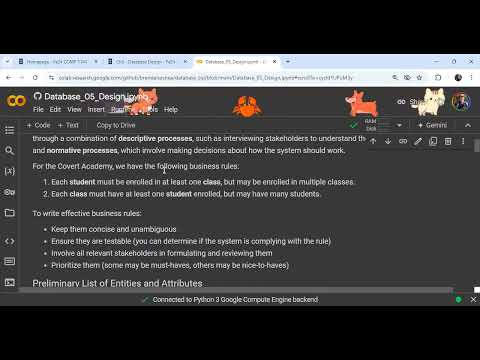

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('6C2KECb9ZwE', width=800, height=500)


## Conceptual Design at the Covert Academy

Welcome to the Covert Academy, the world's premier educational institution for aspiring secret agents! Our state-of-the-art facility is hidden beneath the streets of London and equipped with the latest in espionage technology. We offer a wide range of classes to train our students in the arts of surveillance, infiltration, disguise, and more.

To keep track of our students and classes, we need a well-designed database. Let's walk through the process of conceptual design for this database.

### What is Conceptual Design?

Conceptual design is the first step in creating a database. It involves **formulating business rules**, which define how the database should work and what constraints it should have. It also involves creating a **preliminary list of entities and attributes**, which represent the key concepts and data elements in the system. Finally, it involves creating a **preliminary Entity-Relationship Diagram (ERD)** to visually represent the entities and their relationships.

### Formulating Business Rules

**Business rules** are concise, unambiguous statements that define or constrain some aspect of the database. They are derived through a combination of **descriptive processes**, such as interviewing stakeholders to understand their needs and requirements, and **normative processes**, which involve making decisions about how the system should work.

For the Covert Academy, we have the following business rules:

1.  Each **student** must be enrolled in at least one **class**, but may be enrolled in multiple classes.
2.  Each **class** must have at least one **student** enrolled, but may have many students.

To write effective business rules:

-   Keep them concise and unambiguous
-   Ensure they are testable (you can determine if the system is complying with the rule)
-   Involve all relevant stakeholders in formulating and reviewing them
-   Prioritize them (some may be must-haves, others may be nice-to-haves)

### Preliminary List of Entities and Attributes

Based on our business rules, we can identify our preliminary **entities**, which are the key concepts or objects in our system, and their **attributes**, which are the data elements that describe each entity.

For the Covert Academy, our entities and attributes are:

**Student**

-   Name
-   Codename
-   Nationality
-   Specialization

**Class**

-   Name
-   Description
-   Instructor
-   Location

Note that at this stage, we don't include data types, identifier columns, or join tables. We're just focusing on the core entities and their key attributes.

### Preliminary ERD

Finally, we can create a preliminary ERD to visualize our entities and their relationship. Here's what it looks like for the Covert Academy:

In [ ]:
# @title
import base64
from IPython.display import Image, display, HTML

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""
    erDiagram
    STUDENT |{--|{ CLASS : enrolls
    """)

This diagram shows that there is a many-to-many relationship between **STUDENT** and **CLASS** (a student can enroll in many classes, a class can have many students).

We'll refine this ERD in the next step, logical modeling, where we'll resolve the many-to-many relationship with a join table. But this preliminary ERD gives us a good starting point to visualize our system.


## What is Logical Modeling?
In the previous section, we laid the conceptual foundation for the Covert Academy's database. Now it's time to take that conceptual model and transform it into a **logical model** using the **relational model**.

Logical modeling is the process of taking a conceptual model and adapting it to fit a specific logical data model. In our case, we'll be using the **relational model**, which organizes data into **tables** (also known as relations) with **rows** (also known as tuples) and **columns** (also known as attributes).

In the relational model:

-   Each table should represent a single entity or concept
-   Each row in a table represents a specific instance of that entity
-   Each column in a table represents an attribute of that entity
-   Each table should have a **primary key**, a unique identifier for each row

### Resolving Many-to-Many Relationships

In our conceptual model, we had a many-to-many relationship between **STUDENT** and **CLASS**. However, in the relational model, we can't directly represent many-to-many relationships. Instead, we need to introduce a **join table**.

A join table is a table that breaks down a many-to-many relationship into two one-to-many relationships. It does this by having foreign keys to both of the original tables.

For the Covert Academy, our join table will be called **ENROLLMENT**. It will have the following structure:

**ENROLLMENT**

-   StudentID (Foreign Key to STUDENT)
-   ClassID (Foreign Key to CLASS)
-   EnrollmentDate

Now, instead of a direct many-to-many relationship, we have:

-   A one-to-many relationship between **STUDENT** and **ENROLLMENT**
-   A one-to-many relationship between **CLASS** and **ENROLLMENT**

### Choosing Primary Keys

Each table in our database needs a primary key. A primary key is a unique identifier for each row in a table. There are two main options for primary keys:

1.  **Natural Key**: A natural key is a key that uses one of the existing attributes of the entity. For example, we could use a student's email as the primary key for the STUDENT table. Natural keys can be convenient because they don't require an additional column. However, they can also be problematic if the natural key ever needs to change.
2.  **Surrogate Key**: A surrogate key is an artificial key that is created specifically to be the primary key. It's usually a simple integer or a universally unique identifier (UUID). Surrogate keys are often preferable because they are guaranteed to be unique and they never need to change.

For the Covert Academy, we'll use surrogate keys for all of our tables. We'll call these `ID` columns.

### Updated ERD

With these changes in mind, here's our updated ERD:

In [ ]:
# @title
mm("""
erDiagram
    STUDENT ||--o{ ENROLLMENT : has
    ENROLLMENT }o--|| CLASS : is_for
""")

The tables are as follows:

**STUDENT** (ID (Primary Key), Name, Codename, Nationality, Specialization)

**CLASS** (ID (Primary Key), Name, Description, Instructor, Location)

**ENROLLMENT** (StudentID (Foreign Key to STUDENT), ClassID (Foreign Key to CLASS), EnrollmentDate)

## Logical Modeling: Normalization
A main part of logical modeling involves **normalizing** your data. While our sample database we've been working with so far doesn't directly raise issues related to this, many real-world data sets will, so it's important to understand how this works.

### The Need for Normalization

Imagine you're managing a database for SPECTRE Academy, a prestigious spy training institution. You might be tempted to create a single, large table containing all information about agents, their missions, and their specializations:

| AgentID | Name | Codename | Skills | MissionID | MissionLocation | Handler | HandlerContact |
|---------|------|----------|---------|-----------|-----------------|---------|----------------|
| 1 | James | 007 | Espionage, Combat, Driving | M101 | Venice, Italy | M | 555-0123, 555-0124 |
| 2 | Natasha | Black Widow | Combat, Infiltration, Hacking | M101 | Venice, Italy | M | 555-0123, 555-0124 |
| 3 | Ethan | Ghost | Infiltration, Tech, Combat | M102 | Paris, France | Q | 555-0125 |

At first glance, this might seem convenient - all the information is in one place. However, this design has several serious problems:

1. **Data redundancy** occurs when the same information is stored in multiple places, such as M's contact information being repeated across multiple rows.
2. **Update anomalies** happen when we need to change information in multiple places, such as updating M's phone number across several rows to maintain consistency.
3. **Insertion anomalies** prevent us from adding new data unless other related data exists, such as being unable to add a new handler until they are assigned to an agent.
4. **Deletion anomalies** occur when deleting some data unintentionally removes other important information, such as losing all information about handler Q when removing the last agent they supervise.

This is where normalization comes in.

### What is Normalization?

**Normalization** is a systematic approach to organizing database tables that achieves several important goals:

1. The process eliminates redundant data by organizing information into separate, focused tables.
2. The structure ensures data **dependencies** make logical sense and follow established rules.
3. The resulting design makes the database more efficient and easier to maintain over time.

Think of normalization as organizing your spy agency's filing system: you wouldn't keep complete copies of an agent's dossier in every mission file they're mentioned in. Instead, you'd have a central agents file and reference it from mission files.

### First Normal Form (1NF): The Foundation

A table must meet several requirements to be in First Normal Form:

1. Each column must contain only **atomic values**, which means each value is indivisible.
2. The table must not contain any repeating groups of columns.
3. Each row in the table must be uniquely identifiable through a primary key.
4. Each column in the table must contain values of the same data type.

Let's look at some violations of 1NF in our spy database and how to fix them:

#### Example 1: Multiple Skills in One Column

**Before (Not in 1NF):**

| AgentID | Name | Codename | Skills |
|---------|------|----------|---------|
| 1 | James | 007 | Espionage, Combat, Driving |
| 2 | Natasha | Black Widow | Combat, Infiltration, Hacking |

This violates 1NF because the Skills column contains multiple values.

**After (In 1NF):**

AGENT table:

| AgentID | Name | Codename |
|---------|------|----------|
| 1 | James | 007 |
| 2 | Natasha | Black Widow |

AGENT_SKILLS table:

| AgentID | Skill |
|---------|-------|
| 1 | Espionage |
| 1 | Combat |
| 1 | Driving |
| 2 | Combat |
| 2 | Infiltration |
| 2 | Hacking |

#### Example 2: Multiple Contact Methods

**Before (Not in 1NF):**

| HandlerID | Name | Contact |
|-----------|------|---------|
| 1 | M | 555-0123, 555-0124 |
| 2 | Q | 555-0125, 555-0126 |

**After (In 1NF):**

HANDLER table:

| HandlerID | Name |
|-----------|------|
| 1 | M |
| 2 | Q |

HANDLER_CONTACTS table:

| HandlerID | ContactNumber |
|-----------|--------------|
| 1 | 555-0123 |
| 1 | 555-0124 |
| 2 | 555-0125 |
| 2 | 555-0126 |

### Common Mistakes in 1NF

When working with First Normal Form, database designers must watch out for several common pitfalls:

1. **Hidden non-atomic values** can appear when seemingly single values actually contain multiple pieces of information, such as storing mission locations as "Venice, Italy" in a single column.
2. **Embedded lists** violate normalization rules when they store multiple values in one field, such as storing an agent's equipment as "Gun, Radio, Tracker" in a single column.
3. **Multiple purpose columns** break data consistency when they mix different types of data, such as using a single "Contact" column that sometimes contains phone numbers and sometimes contains email addresses.

### Benefits of 1NF

Achieving First Normal Form provides several important benefits for your database:

1. **Simplified queries** enable users to search data more effectively because each piece of information exists in its own column.
2. **Data integrity** improves significantly because each piece of information is stored exactly once in the database.
3. **Data updates** become much simpler because changes only need to be made in one place rather than in multiple locations.
4. **Database performance** increases because indexes can be created on atomic values, making searches more efficient.

### When to Break 1NF

While normalization is generally desirable, certain situations may require denormalization:

1. Performance optimization sometimes requires denormalized data structures when the application needs to display frequently accessed information together.
2. Report generation systems often benefit from denormalized data when they must compile information from multiple sources into a single view.
3. Database system limitations may make fully normalized designs impractical when the system restricts the number of allowed table joins.

However, breaking 1NF should be a conscious, documented decision based on specific requirements rather than convenience.

In the next section, we'll explore Second Normal Form (2NF) and how it builds upon these foundational principles to further improve our database design.

## Second Normal Form (2NF)

Once a database achieves First Normal Form, the next step is to evaluate it for Second Normal Form compliance. Second Normal Form builds upon 1NF by addressing a specific type of data dependency.

A table is in Second Normal Form when:

1. The table is already in First Normal Form.
2. Every non-key attribute in the table is fully functionally dependent on the entire primary key.

The concept of **functional dependency** means that one attribute's value determines another attribute's value. A **full functional dependency** exists when an attribute depends on the entire primary key, not just part of it.

### Recognizing Partial Dependencies

Let's examine a table from our spy training academy that tracks agent certifications:

| AgentID | SkillID | CertificationDate | SkillName | SkillDifficulty |
|---------|---------|------------------|------------|-----------------|
| 007 | S1 | 2023-01-15 | Lockpicking | Advanced |
| 007 | S2 | 2023-02-01 | Surveillance | Expert |
| 008 | S1 | 2023-03-10 | Lockpicking | Advanced |

In this table, the primary key consists of both AgentID and SkillID together. Let's analyze the dependencies:

1. CertificationDate depends on both AgentID and SkillID (when a specific agent completed a specific skill).
2. SkillName depends only on SkillID (a skill's name doesn't change based on the agent).
3. SkillDifficulty depends only on SkillID (a skill's difficulty level is the same for all agents).

The partial dependencies in this table violate Second Normal Form because SkillName and SkillDifficulty depend only on SkillID, which is just part of the primary key.

### Converting to 2NF

To achieve Second Normal Form, we separate the attributes that depend on only part of the primary key into their own table:

**AGENT_CERTIFICATIONS table:**

| AgentID | SkillID | CertificationDate |
|---------|---------|------------------|
| 007 | S1 | 2023-01-15 |
| 007 | S2 | 2023-02-01 |
| 008 | S1 | 2023-03-10 |

**SKILLS table:**

| SkillID | SkillName | SkillDifficulty |
|---------|-----------|-----------------|
| S1 | Lockpicking | Advanced |
| S2 | Surveillance | Expert |

### Another 2NF Example

Consider a table tracking mission equipment assignments:

| MissionID | AgentID | EquipmentID | MissionLocation | EquipmentName | EquipmentType |
|-----------|---------|-------------|-----------------|---------------|---------------|
| M1 | 007 | E1 | Venice | Laser Watch | Gadget |
| M1 | 007 | E2 | Venice | Grappling Hook | Tool |
| M2 | 008 | E1 | Paris | Laser Watch | Gadget |

This table has several problems:

1. MissionLocation depends only on MissionID.
2. EquipmentName and EquipmentType depend only on EquipmentID.

To achieve 2NF, we create three separate tables:

**MISSION_EQUIPMENT table:**

| MissionID | AgentID | EquipmentID |
|-----------|---------|-------------|
| M1 | 007 | E1 |
| M1 | 007 | E2 |
| M2 | 008 | E1 |

**MISSIONS table:**

| MissionID | MissionLocation |
|-----------|-----------------|
| M1 | Venice |
| M2 | Paris |

**EQUIPMENT table:**

| EquipmentID | EquipmentName | EquipmentType |
|-------------|---------------|---------------|
| E1 | Laser Watch | Gadget |
| E2 | Grappling Hook | Tool |

### Benefits of Second Normal Form

Moving to Second Normal Form provides several important benefits:

1. Data consistency improves because information about each entity is stored in only one place.
2. Update operations become more reliable because related data is properly grouped together.
3. Storage efficiency increases because the database eliminates redundant data storage.
4. Data modifications become safer because changes to one aspect of the data won't affect unrelated aspects.

### Common 2NF Mistakes to Avoid

Database designers should watch for these common issues when working with Second Normal Form:

1. Composite keys are sometimes overlooked when analyzing dependencies, leading to incomplete normalization.
2. Transitive dependencies might be missed when focusing only on partial dependencies.
3. Over-normalization can occur when splitting tables unnecessarily, making the database harder to understand.

In the next section, we'll explore Third Normal Form and examine how it addresses transitive dependencies to further improve database design.

##  Third Normal Form and Beyond

After achieving Second Normal Form, databases can still suffer from certain types of data redundancy. Third Normal Form (3NF) addresses these issues by eliminating **transitive dependencies**.

A table is in Third Normal Form when:

1. The table already exists in Second Normal Form.
2. Every non-key attribute in the table depends on the key, the whole key, and nothing but the key.

A **transitive dependency** occurs when one non-key attribute depends on another non-key attribute, rather than depending directly on the primary key.

### Identifying Transitive Dependencies

Consider this table from our spy academy's personnel database:

| AgentID | Name | HandlerID | HandlerName | HandlerRank |
|---------|------|-----------|-------------|-------------|
| 007 | James | H1 | M | Director |
| 008 | Eve | H1 | M | Director |
| 009 | Felix | H2 | Q | Quartermaster |

In this table:
1. Name depends on AgentID (the primary key)
2. HandlerName depends on HandlerID (not on AgentID)
3. HandlerRank depends on HandlerID (not on AgentID)

We have transitive dependencies because HandlerName and HandlerRank depend on HandlerID, which itself depends on AgentID. This creates problems:

1. Handler information is duplicated for every agent they handle.
2. Updating a handler's rank requires changing multiple rows.
3. Adding a new handler requires an assigned agent.

### Converting to 3NF

To achieve Third Normal Form, we separate the transitively dependent attributes into their own table:

**AGENTS table:**

| AgentID | Name | HandlerID |
|---------|------|-----------|
| 007 | James | H1 |
| 008 | Eve | H1 |
| 009 | Felix | H2 |

**HANDLERS table:**

| HandlerID | HandlerName | HandlerRank |
|-----------|-------------|-------------|
| H1 | M | Director |
| H2 | Q | Quartermaster |

### Another 3NF Example

Here's another example showing mission assignments:

| MissionID | Location | RegionalDirector | DirectorOffice |
|-----------|----------|------------------|----------------|
| M1 | Venice | Signora B | Venice HQ |
| M2 | Venice | Signora B | Venice HQ |
| M3 | Paris | Monsieur C | Paris HQ |

The transitive dependencies here are:
1. RegionalDirector depends on Location
2. DirectorOffice depends on Location

To achieve 3NF:

**MISSIONS table:**

| MissionID | Location |
|-----------|----------|
| M1 | Venice |
| M2 | Venice |
| M3 | Paris |

**REGIONAL_OFFICES table:**

| Location | RegionalDirector | DirectorOffice |
|----------|------------------|----------------|
| Venice | Signora B | Venice HQ |
| Paris | Monsieur C | Paris HQ |

### Benefits of Third Normal Form

Moving a database to Third Normal Form provides several critical advantages:

1. Data consistency increases because related information is stored in a single location.
2. Data maintenance becomes simpler because updates only need to happen in one place.
3. Data integrity improves because there are fewer opportunities for data to become out of sync.
4. Storage efficiency increases because redundant information is eliminated from the database.

### Beyond Third Normal Form

While 3NF is sufficient for most applications, higher normal forms exist:

1. **Boyce-Codd Normal Form (BCNF)** strengthens 3NF by ensuring that every determinant is a candidate key.
2. **Fourth Normal Form (4NF)** addresses multi-valued dependencies in the database.
3. **Fifth Normal Form (5NF)** deals with join dependencies that are not implied by candidate keys.

Most real-world applications stop at 3NF because:

1. The complexity of implementing higher normal forms often outweighs their benefits.
2. The performance impact of additional table joins can become significant.
3. The types of dependencies addressed by higher normal forms rarely occur in practice.

### Practical Normalization Strategy

When normalizing a database in practice, follow these steps:

1. Begin by identifying all attributes and their relationships in your database design.
2. Ensure your tables meet the requirements for First Normal Form.
3. Analyze and resolve partial dependencies to achieve Second Normal Form.
4. Identify and eliminate transitive dependencies to reach Third Normal Form.
5. Evaluate whether higher normal forms would provide meaningful benefits for your specific case.

### Denormalization Considerations

Sometimes, you may choose to denormalize a 3NF database for practical reasons:

1. Query performance requirements might necessitate combining frequently joined tables.
2. Reporting needs could make denormalized data structures more efficient.
3. Application-specific requirements might favor denormalized data access patterns.

### Conclusion: Normalization

Database normalization is a powerful tool for ensuring data integrity and reducing redundancy. While higher normal forms exist, Third Normal Form typically provides the optimal balance between:

1. Data integrity is maintained through proper organization of attributes and dependencies.
2. Query performance remains practical for most real-world applications.
3. Database maintenance stays manageable for development and operations teams.
4. Storage efficiency achieves a good balance between redundancy and accessibility.

Remember that normalization is a means to an end, not an end in itself. The goal is to create a database that is both efficient and practical for its intended use.

## Quiz: Normalize This

In [ ]:
# @title
%%html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Database Normalization Quiz</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            max-width: 1000px;
            margin: 0 auto;
            padding: 20px;
        }
        .quiz-container {
            background-color: white;
            padding: 20px;
            border: 1px solid #ddd;
            border-radius: 5px;
        }
        table {
            border-collapse: collapse;
            width: 100%;
            margin: 20px 0;
            overflow-x: auto;
            display: block;
        }
        th, td {
            padding: 8px;
            border: 1px solid #ddd;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
            font-weight: bold;
        }
        th.primary-key {
            background-color: #4a6fa5;
            color: white;
        }
        th.primary-key::after {
            content: " 🔑";
            font-size: 14px;
        }
        .option-btn {
            padding: 8px 15px;
            margin: 5px;
            background-color: #f0f0f0;
            border: 1px solid #ddd;
            border-radius: 4px;
            cursor: pointer;
        }
        .option-btn:hover {
            background-color: #e0e0e0;
        }
        .feedback {
            padding: 10px;
            margin: 10px 0;
            border-radius: 4px;
            display: none;
        }
        .correct {
            background-color: #d4edda;
            border: 1px solid #c3e6cb;
        }
        .incorrect {
            background-color: #f8d7da;
            border: 1px solid #f5c6cb;
        }
        .explanation {
            background-color: #e9f7fe;
            padding: 10px;
            border: 1px solid #b8daff;
            border-radius: 4px;
            margin-top: 10px;
            display: none;
        }
        .button {
            padding: 8px 15px;
            background-color: #4a6fa5;
            color: white;
            border: none;
            border-radius: 4px;
            cursor: pointer;
            margin-right: 10px;
        }
        .hidden {
            display: none;
        }
    </style>
</head>
<body>
    <h1>Database Normalization Quiz</h1>

    <div class="quiz-container">
        <h2>Identify the Normalization Level</h2>
        <p>Examine the table below and select its normalization level:</p>

        <div id="tableDisplay"></div>

        <div id="options">
            <button class="option-btn" onclick="checkAnswer('unnormalized')">Unnormalized</button>
            <button class="option-btn" onclick="checkAnswer('1nf')">1NF but not 2NF</button>
            <button class="option-btn" onclick="checkAnswer('2nf')">2NF but not 3NF</button>
            <button class="option-btn" onclick="checkAnswer('3nf')">3NF</button>
        </div>

        <div id="feedback" class="feedback"></div>
        <div id="explanation" class="explanation"></div>

        <button id="nextBtn" class="button" onclick="nextQuestion()">Next Question</button>
        <button id="restartBtn" class="button hidden" onclick="restartQuiz()">Restart Quiz</button>
    </div>

    <div id="scoreDisplay">Score: 0/0</div>

    <script>
        // Simplified tables array with one example from each normalization level
        const tables = [
            // Unnormalized
            {
                name: "E-commerce Order Table",
                level: "unnormalized",
                explanation: "This table is unnormalized because it contains multi-valued attributes (multiple products, prices, and quantities in a single row) and repeating groups of data.",
                headers: ["OrderID", "CustomerName", "CustomerEmail", "CustomerPhone", "ProductName", "ProductCategory", "ProductPrice", "Quantity", "OrderDate", "ShippingAddress"],
                primaryKeys: [0],
                rows: [
                    ["1001", "Jane Smith", "jane@email.com", "555-1234", "Laptop, Headphones", "Electronics, Audio", "$1200, $80", "1, 2", "2024-02-10", "123 Main St, Boston MA"],
                    ["1002", "Mike Johnson", "mike@email.com", "555-5678", "Coffee Maker, Coffee Beans", "Kitchen, Food", "$65, $12", "1, 3", "2024-02-15", "456 Oak Ave, Chicago IL"]
                ]
            },
            // 1NF but not 2NF
            {
                name: "Student Club Membership",
                level: "1nf",
                explanation: "This table is in 1NF but not 2NF because non-key attributes (StudentName, Major) depend only on StudentID, and ClubName and YearFounded depend only on ClubID, not the full composite key.",
                headers: ["StudentID", "ClubID", "StudentName", "Major", "ClubName", "YearFounded", "JoinDate", "Position"],
                primaryKeys: [0, 1],
                rows: [
                    ["ST001", "C01", "Alice Wong", "Computer Science", "Robotics Club", "2010", "2023-09-15", "Member"],
                    ["ST002", "C02", "Brian Lee", "Physics", "Astronomy Club", "2005", "2022-10-01", "President"]
                ]
            },
            // 2NF but not 3NF
            {
                name: "Vehicle Registration",
                level: "2nf",
                explanation: "This table is in 2NF but not 3NF because of transitive dependencies: OwnerName and OwnerAddress depend on OwnerID, not directly on the primary key VehicleID.",
                headers: ["VehicleID", "OwnerID", "Make", "Model", "Year", "OwnerName", "OwnerAddress", "RegistrationExpiry", "RegistrationFee"],
                primaryKeys: [0],
                rows: [
                    ["V5001", "O101", "Toyota", "Camry", "2020", "Thomas Wilson", "123 Elm St, Denver CO", "2024-12-31", "$120"],
                    ["V5002", "O102", "Honda", "Civic", "2021", "Rachel Lee", "456 Maple Ave, Austin TX", "2025-03-15", "$110"]
                ]
            },
            // 3NF
            {
                name: "Customers",
                level: "3nf",
                explanation: "This table is in 3NF because all attributes are dependent only on the primary key (CustomerID) and there are no transitive dependencies.",
                headers: ["CustomerID", "FirstName", "LastName", "Email", "Phone", "SignupDate"],
                primaryKeys: [0],
                rows: [
                    ["C1001", "Emily", "Johnson", "emily@email.com", "555-1234", "2023-10-15"],
                    ["C1002", "Carlos", "Rodriguez", "carlos@email.com", "555-5678", "2024-01-03"]
                ]
            },
            // Additional Unnormalized Tables
{
    name: "University Course Registration",
    level: "unnormalized",
    explanation: "This table is unnormalized because it contains multi-valued attributes (multiple courses, instructors, rooms, schedules, and credits in a single row) and repeating groups of data.",
    headers: ["StudentID", "StudentName", "StudentEmail", "CourseID", "CourseName", "Instructor", "InstructorEmail", "Room", "Schedule", "Credits"],
    primaryKeys: [0],
    rows: [
        ["S101", "Tim Brown", "tim@uni.edu", "C201, C305", "Database Systems, Web Development", "Dr. Lee, Prof. Garcia", "lee@uni.edu, garcia@uni.edu", "R101, R204", "MWF 10-11, TTh 2-4", "3, 4"],
        ["S102", "Sarah Chen", "sarah@uni.edu", "C305, C110", "Web Development, Intro to Programming", "Prof. Garcia, Dr. Johnson", "garcia@uni.edu, johnson@uni.edu", "R204, R105", "TTh 2-4, MWF 9-10", "4, 3"]
    ]
},
{
    name: "Library Book Collection",
    level: "unnormalized",
    explanation: "This table is unnormalized because it contains multi-valued attributes (multiple authors, genres, borrow history) and non-atomic values in a single field.",
    headers: ["BookID", "Title", "Authors", "Publisher", "PublisherAddress", "Genres", "PublicationYear", "ISBN", "ShelfLocation", "BorrowHistory"],
    primaryKeys: [0],
    rows: [
        ["B1001", "The Great Gatsby", "F. Scott Fitzgerald", "Scribner", "New York, NY", "Fiction, Classic", "1925", "978-0743273565", "Fiction-A12", "J. Smith (Jan 2024), M. Lee (Nov 2023)"],
        ["B1002", "Introduction to Algorithms", "Thomas Cormen, Charles Leiserson, Ronald Rivest, Clifford Stein", "MIT Press", "Cambridge, MA", "Computer Science, Textbook", "2009", "978-0262033848", "CS-B04", "A. Johnson (Dec 2023), P. Wong (Feb 2024)"]
    ]
},
{
    name: "Medical Patient Records",
    level: "unnormalized",
    explanation: "This table is unnormalized because it contains multi-valued attributes (allergies, visits, medications, doctors) and non-atomic values in several fields.",
    headers: ["PatientID", "Name", "DOB", "Address", "Phone", "Allergies", "Visits", "Medications", "Doctors", "Insurance"],
    primaryKeys: [0],
    rows: [
        ["P5001", "Robert Davis", "1978-05-12", "789 Pine St, Portland OR", "555-9876", "Penicillin, Peanuts", "2023-12-10 (Checkup), 2024-01-15 (Flu)", "Lisinopril, Albuterol", "Dr. Smith (Primary), Dr. Chen (Pulmonary)", "BlueCross #12345"],
        ["P5002", "Maria Lopez", "1992-08-03", "234 Cedar Ln, Seattle WA", "555-3456", "None", "2024-01-20 (Checkup), 2024-02-05 (Injury)", "Ibuprofen", "Dr. Johnson (Primary), Dr. Patel (Orthopedic)", "Aetna #67890"]
    ]
},
{
    name: "Restaurant Menu Items",
    level: "unnormalized",
    explanation: "This table is unnormalized because it contains multi-valued attributes (ingredients, prices, dietary options, availability, popular with, special offers) and non-atomic values in several fields.",
    headers: ["ItemID", "Name", "Category", "Ingredients", "Prices", "Dietary", "Availability", "PopularWith", "PrepTime", "SpecialOffers"],
    primaryKeys: [0],
    rows: [
        ["I101", "Margherita Pizza", "Pizza, Italian", "Dough, Tomato Sauce, Mozzarella, Basil", "Small $12, Medium $15, Large $18", "Vegetarian", "Lunch, Dinner", "Families, Students", "15 minutes", "Monday 2-for-1, Weekend Special"],
        ["I102", "Chicken Caesar Salad", "Salad, American", "Romaine, Grilled Chicken, Croutons, Caesar Dressing, Parmesan", "Half $8, Full $12", "Gluten-Free Option", "All Day", "Business Lunch, Health-Conscious", "10 minutes", "Lunch Special, Catering Option"]
    ]
},

// Additional 1NF but not 2NF Tables
{
    name: "Sports League Statistics",
    level: "1nf",
    explanation: "This table is in 1NF (atomic values, no repeating groups) but not 2NF because non-key attributes (PlayerName, TeamName) depend on only part of the composite key (PlayerID-TeamID-Season).",
    headers: ["PlayerID", "TeamID", "Season", "PlayerName", "TeamName", "Position", "GamesPlayed", "Points"],
    primaryKeys: [0, 1, 2],
    rows: [
        ["P101", "T01", "2023", "LeBron James", "LA Lakers", "Forward", "65", "1870"],
        ["P102", "T02", "2023", "Kevin Durant", "Phoenix Suns", "Forward", "58", "1664"]
    ]
},
{
    name: "Product Inventory",
    level: "1nf",
    explanation: "This table is in 1NF but not 2NF because non-key attributes (ProductName, Category) depend on only part of the composite key (ProductID-WarehouseID), and WarehouseLocation depends only on WarehouseID.",
    headers: ["ProductID", "WarehouseID", "ProductName", "WarehouseLocation", "Category", "QuantityInStock"],
    primaryKeys: [0, 1],
    rows: [
        ["P001", "W01", "Ergonomic Chair", "New York", "Furniture", "45"],
        ["P002", "W02", "Laptop Stand", "Chicago", "Accessories", "120"]
    ]
},
{
    name: "Hotel Bookings",
    level: "1nf",
    explanation: "This table is in 1NF but not 2NF because non-key attributes (GuestName, GuestEmail) depend only on GuestID, and RoomType and RoomRate depend only on RoomID, not the full composite key.",
    headers: ["GuestID", "RoomID", "BookingDate", "GuestName", "GuestEmail", "RoomType", "RoomRate", "CheckInDate", "CheckOutDate"],
    primaryKeys: [0, 1, 2],
    rows: [
        ["G1001", "R101", "2024-01-15", "Emma Johnson", "emma@email.com", "Deluxe", "$150", "2024-03-10", "2024-03-15"],
        ["G1002", "R205", "2024-02-01", "David Miller", "david@email.com", "Suite", "$250", "2024-04-05", "2024-04-10"]
    ]
},
{
    name: "Movie Ratings",
    level: "1nf",
    explanation: "This table is in 1NF but not 2NF because non-key attributes (UserName, UserEmail) depend only on UserID, and MovieTitle, Director, and Genre depend only on MovieID, not the full composite key.",
    headers: ["UserID", "MovieID", "UserName", "UserEmail", "MovieTitle", "Director", "Genre", "Rating", "ReviewDate"],
    primaryKeys: [0, 1],
    rows: [
        ["U501", "M101", "Alex Chen", "alex@email.com", "The Shawshank Redemption", "Frank Darabont", "Drama", "5", "2024-01-20"],
        ["U502", "M203", "Jessica Park", "jessica@email.com", "Inception", "Christopher Nolan", "Sci-Fi", "4", "2024-02-05"]
    ]
},

// Additional 2NF but not 3NF Tables
{
    name: "Employee Department Assignment",
    level: "2nf",
    explanation: "This table is in 2NF but not 3NF because there's a transitive dependency: DepartmentName and DepartmentHead depend on DepartmentID, not directly on the primary key EmployeeID.",
    headers: ["EmployeeID", "DepartmentID", "EmployeeName", "DepartmentName", "DepartmentHead", "ManagerID"],
    primaryKeys: [0],
    rows: [
        ["E001", "D01", "John Smith", "Engineering", "Lisa Johnson", "M101"],
        ["E002", "D02", "Maria Garcia", "Marketing", "Robert Davis", "M102"]
    ]
},
{
    name: "Airline Flight Schedule",
    level: "2nf",
    explanation: "This table is in 2NF but not 3NF because AirlineName and AirlineCountry depend on AirlineID, not directly on the primary key FlightID.",
    headers: ["FlightID", "AirlineID", "DepartureCity", "ArrivalCity", "AirlineName", "AirlineCountry", "DepartureTime", "ArrivalTime"],
    primaryKeys: [0],
    rows: [
        ["FL001", "AL01", "New York", "London", "British Airways", "United Kingdom", "2024-03-15 20:00", "2024-03-16 08:30"],
        ["FL002", "AL02", "Los Angeles", "Tokyo", "Japan Airlines", "Japan", "2024-03-20 12:15", "2024-03-21 16:45"]
    ]
},
{
    name: "Online Course Enrollment",
    level: "2nf",
    explanation: "This table is in 2NF but not 3NF because CourseName, InstructorName, InstructorEmail, and CoursePrice all depend on CourseID, not directly on the primary key combination of StudentID and CourseID.",
    headers: ["StudentID", "CourseID", "EnrollmentDate", "StudentName", "CourseName", "InstructorName", "InstructorEmail", "CoursePrice"],
    primaryKeys: [0, 1],
    rows: [
        ["ST501", "C101", "2024-01-10", "Michael Brown", "Python Programming", "Dr. Lisa Chen", "lisa@academy.edu", "$99"],
        ["ST502", "C203", "2024-02-05", "Jennifer Lopez", "Data Science Basics", "Prof. James Wilson", "james@academy.edu", "$129"]
    ]
},
{
    name: "Product Pricing",
    level: "2nf",
    explanation: "This table is in 2NF but not 3NF because RegionName, CountryCode, and Currency depend on RegionID, not directly on the primary key combination of ProductID and RegionID.",
    headers: ["ProductID", "RegionID", "ProductName", "Category", "RegionName", "CountryCode", "Currency", "BasePrice", "TaxRate"],
    primaryKeys: [0, 1],
    rows: [
        ["P201", "R01", "Smart Watch", "Electronics", "North America", "US", "USD", "199", "8.5%"],
        ["P202", "R02", "Smart Watch", "Electronics", "Europe", "EU", "EUR", "179", "20%"]
    ]
},

// Additional 3NF Tables
{
    name: "Products",
    level: "3nf",
    explanation: "This table is in 3NF because all attributes depend only on the primary key (ProductID) and there are no transitive dependencies.",
    headers: ["ProductID", "Name", "Description", "Category", "Price", "StockLevel"],
    primaryKeys: [0],
    rows: [
        ["P101", "Wireless Earbuds", "Bluetooth 5.0 noise-canceling earbuds", "Electronics", "$79.99", "150"],
        ["P102", "Yoga Mat", "Non-slip 6mm thick exercise mat", "Fitness", "$29.99", "75"]
    ]
},
{
    name: "Employees",
    level: "3nf",
    explanation: "This table is in 3NF because all attributes depend only on the primary key (EmployeeID) and there are no transitive dependencies. DepartmentID is a foreign key to another table.",
    headers: ["EmployeeID", "FirstName", "LastName", "Email", "DepartmentID", "HireDate", "Salary"],
    primaryKeys: [0],
    rows: [
        ["E501", "Sarah", "Miller", "sarah@company.com", "D03", "2022-05-10", "$75000"],
        ["E502", "James", "Wilson", "james@company.com", "D01", "2023-02-15", "$82000"]
    ]
},
{
    name: "Departments",
    level: "3nf",
    explanation: "This table is in 3NF because all attributes depend only on the primary key (DepartmentID) and there are no transitive dependencies. ManagerID is a foreign key to the Employees table.",
    headers: ["DepartmentID", "Name", "Location", "ManagerID", "Budget"],
    primaryKeys: [0],
    rows: [
        ["D01", "Engineering", "Building A", "E405", "$1200000"],
        ["D02", "Marketing", "Building B", "E308", "$850000"]
    ]
},
{
    name: "Books",
    level: "3nf",
    explanation: "This table is in 3NF because all attributes depend only on the primary key (ISBN) and there are no transitive dependencies.",
    headers: ["ISBN", "Title", "Author", "Publisher", "PublicationYear", "Category", "Price"],
    primaryKeys: [0],
    rows: [
        ["978-0061120084", "To Kill a Mockingbird", "Harper Lee", "HarperCollins", "1960", "Fiction", "$12.99"],
        ["978-0544003415", "The Lord of the Rings", "J.R.R. Tolkien", "Mariner Books", "1954", "Fantasy", "$19.99"]
    ]
}
        ];

        // Quiz state
        let currentTableIndex;
        let correctAnswers = 0;
        let totalQuestions = 0;
        const usedTableIndices = new Set();

        // Initialize immediately without waiting for window.onload
        // This ensures the quiz loads properly in Jupyter
        initQuiz();

        function initQuiz() {
            usedTableIndices.clear();
            correctAnswers = 0;
            totalQuestions = 0;
            updateScore();

            // Explicitly set the first question instead of using nextQuestion
            // This ensures the first table is always displayed
            currentTableIndex = 0;
            usedTableIndices.add(currentTableIndex);
            displayTable(tables[currentTableIndex]);

            document.getElementById('nextBtn').style.display = 'inline-block';
            document.getElementById('restartBtn').style.display = 'none';
            document.getElementById('options').style.display = 'block';
        }

        function nextQuestion() {
            // Reset UI elements
            document.getElementById('feedback').style.display = 'none';
            document.getElementById('explanation').style.display = 'none';

            // Enable all option buttons
            const optionBtns = document.querySelectorAll('.option-btn');
            optionBtns.forEach(btn => {
                btn.disabled = false;
                btn.style.opacity = 1;
            });

            // Check if we've used all tables
            if (usedTableIndices.size >= tables.length) {
                showFinalScore();
                return;
            }

            // Select a random table that hasn't been used yet
            do {
                currentTableIndex = Math.floor(Math.random() * tables.length);
            } while (usedTableIndices.has(currentTableIndex));

            usedTableIndices.add(currentTableIndex);
            displayTable(tables[currentTableIndex]);
        }

        function displayTable(tableData) {
            let tableHTML = `
                <h3>${tableData.name}</h3>
                <table>
                    <thead>
                        <tr>`;

            // Add headers
            for (let i = 0; i < tableData.headers.length; i++) {
                if (tableData.primaryKeys.includes(i)) {
                    tableHTML += `<th class="primary-key">${tableData.headers[i]}</th>`;
                } else {
                    tableHTML += `<th>${tableData.headers[i]}</th>`;
                }
            }

            tableHTML += `</tr>
                    </thead>
                    <tbody>`;

            // Add rows
            for (let row of tableData.rows) {
                tableHTML += `<tr>`;
                for (let cell of row) {
                    tableHTML += `<td>${cell}</td>`;
                }
                tableHTML += `</tr>`;
            }

            tableHTML += `</tbody>
                </table>`;

            document.getElementById('tableDisplay').innerHTML = tableHTML;
        }

        function checkAnswer(selectedAnswer) {
            const correctAnswer = tables[currentTableIndex].level;
            totalQuestions++;

            // Disable all option buttons
            const optionBtns = document.querySelectorAll('.option-btn');
            optionBtns.forEach(btn => {
                btn.disabled = true;
                btn.style.opacity = 0.6;
            });

            // Show feedback
            const feedbackEl = document.getElementById('feedback');
            if (selectedAnswer === correctAnswer) {
                correctAnswers++;
                feedbackEl.innerHTML = 'Correct! ✓';
                feedbackEl.className = 'feedback correct';
            } else {
                feedbackEl.innerHTML = 'Incorrect. ✗';
                feedbackEl.className = 'feedback incorrect';
            }
            feedbackEl.style.display = 'block';

            // Show explanation
            const explanationEl = document.getElementById('explanation');
            explanationEl.innerHTML = `<strong>Explanation:</strong> ${tables[currentTableIndex].explanation}`;
            explanationEl.style.display = 'block';

            updateScore();
        }

        function updateScore() {
            document.getElementById('scoreDisplay').textContent = `Score: ${correctAnswers}/${totalQuestions}`;
        }

        function showFinalScore() {
            document.getElementById('tableDisplay').innerHTML = `
                <h3>Quiz Complete!</h3>
                <p>You scored ${correctAnswers} out of ${totalQuestions}.</p>
                <p>Your accuracy: ${Math.round((correctAnswers / totalQuestions) * 100)}%</p>
            `;

            document.getElementById('options').style.display = 'none';
            document.getElementById('nextBtn').style.display = 'none';
            document.getElementById('restartBtn').style.display = 'inline-block';
        }

        function restartQuiz() {
            initQuiz();
        }
    </script>
</body>
</html>

## Physical Modeling - Bringing the Database to Life

We've conceptually designed our database and transformed it into a logical model using the relational model and normalization techniques. Now it's time for the exciting part - actually creating our database!

**Physical modeling** is the process of taking the logical model and implementing it in a specific database management system (DBMS). This involves defining the actual tables, columns, data types, and constraints in the database using the Data Definition Language (DDL) of the chosen DBMS.

For the Covert Academy's database, we'll be using **SQLite** (which is what we've used in the class so far).

SQLite is a lightweight, file-based DBMS. It's a popular choice for many applications because:

1.  It's serverless (the database is just a file)
2.  It's self-contained (no external dependencies)
3.  It's cross-platform (works on all major operating systems)
4.  It's open-source and free to use

SQLite, like most modern DBMSs, uses **SQL (Structured Query Language)** for defining and manipulating databases.


## ASNI SQL Data Types: Standards, Implementation, and Best Practices

The **American National Standards Institute (ANSI)** plays a crucial role in defining standardized specifications for various technologies, including database systems. The ANSI SQL standard, officially known as **SQL/Foundation**, provides a common framework that database systems can implement to ensure compatibility and portability of SQL code across different platforms.

The SQL standard has evolved significantly since its first publication in 1986, progressing through several major revisions including SQL-92, SQL:1999, and more recent versions like SQL:2016 and SQL:2019. While ANSI initiated the standardization process, the **International Organization for Standardization (ISO)** now maintains and develops the SQL standard, which is why people often refer to it as ANSI/ISO SQL.

SQL standards serve several critical purposes. They ensure portability of database applications across different systems, provide a common language for database professionals, create a stable foundation for database technologies, and establish best practices for database design. Despite these benefits, it's important to recognize that no database system fully implements every aspect of the SQL standard - each **Database Management System (DBMS)** has its own extensions, limitations, and interpretations of the standard, creating what we call "SQL dialects."

### ANSI Standard SQL Data Types in Detail

The SQL standard defines a rich set of data types to represent various kinds of information. Let's explore these with spy-themed examples:

#### Numeric Data Types

**INTEGER (or INT)** stores whole numbers without decimal points. With typically 4 bytes of storage, it can handle values from about -2.1 billion to +2.1 billion.

* Agent identification numbers (007, 008, 009)
* Mission counts (42 completed missions)
* Inventory quantities (15 tracking devices)
* Building floor numbers (Basement level -2)
* Security zone identifiers (Zone 4)

**SMALLINT** is a more compact version of INTEGER, using 2 bytes to store values from approximately -32,768 to 32,767.

* Security clearance levels (1-10)
* Number of gadgets checked out from Q Branch (23)
* Days since last contact with field agent (45)
* Number of personnel assigned to a safe house (8)
* Communication frequency channels (1-999)

**BIGINT** provides expanded range with 8 bytes of storage, making it suitable for extremely large numbers.

* Millisecond-precision timestamps of surveillance recordings
* Unique message identifiers in global communication networks
* Microphone signal frequencies in hertz
* Total bytes transmitted in encrypted communications
* Nanometer-precise measurements for explosive components

**DECIMAL(p,s)** or **NUMERIC(p,s)** store exact decimal numbers with specified precision (p) and scale (s).

* Mission budget allocations (DECIMAL(12,2) for $1,456,789.45)
* Precise explosive compound mixtures (DECIMAL(5,3) for 98.765% purity)
* Exact geolocation coordinates (DECIMAL(9,6) for 51.501364, -0.141890)
* Asset payment records (DECIMAL(10,2) for exact financial accounting)
* Formulation ratios for chemical compounds (DECIMAL(7,5) for 0.00375)

**REAL** or **FLOAT** handle approximate floating-point numbers using 4 bytes.

* Radiation levels at surveillance sites (0.217 rems)
* Approximate distances in kilometers from safe houses (12.7 km)
* Probability calculations for mission success scenarios (0.875)
* Signal strength measurements (-42.6 dBm)
* Atmospheric pressure readings during operations (1013.25 hPa)

#### Character Data Types

**CHAR(n)** creates fixed-length character strings, always using exactly n bytes or characters.

* Country codes of operation sites (CHAR(2) for 'US', 'UK', 'RU')
* Agent status codes (CHAR(3) for 'ACT', 'MIA', 'KIA')
* Fixed-format radio call signs (CHAR(6) for 'EAGLE1')
* ISO currency codes (CHAR(3) for 'USD', 'EUR', 'GBP')
* Security level identifiers (CHAR(1) for 'A', 'B', 'C', 'S')

**VARCHAR(n)** allows variable-length strings with a maximum length of n, storing only what's needed plus minimal overhead.

* Agent code names ('Black Widow', 'Ghost', '007')
* Operation names ('Skyfall', 'Treadstone', 'Blackbriar')
* Surveillance site descriptions ('Embassy back entrance')
* Contact method instructions ('Dead drop at the usual location')
* Vehicle license plates ('LR58 WKF', 'S3CR3T')

**TEXT** or **CLOB** (Character Large Object) handles large text content.

* Complete mission briefings
* Detailed asset dossiers
* Intercepted communications transcripts
* Field agent reports
* Psychological evaluation profiles

#### Temporal Data Types

**DATE** represents calendar dates in 'YYYY-MM-DD' format using 3-4 bytes.

* Mission start dates ('2023-11-15')
* Agent recruitment dates ('2020-05-22')
* Scheduled extraction dates ('2023-12-01')
* Passport/documentation expiration dates ('2025-08-30')
* Scheduled maintenance of surveillance equipment ('2023-10-05')

**TIME** stores the time of day in 'HH:MM:SS' format.

* Precise timing of agent check-ins ('07:30:00')
* Scheduled dead drops ('23:15:00')
* Shift rotations at surveillance outposts ('18:00:00')
* Communication window openings ('22:00:00')
* Target movement patterns ('08:45:00' daily departure)

**TIMESTAMP** combines date and time information.

* Security breach occurrences ('2023-11-15 02:17:42')
* Classified message transmission logs ('2023-11-10 23:42:18')
* Emergency protocol activations ('2023-11-05 14:32:07')
* Facial recognition matches ('2023-11-12 16:05:33')
* Alarm trigger events ('2023-11-14 01:27:59')

#### Binary Data Types

**BINARY(n)** and **VARBINARY(n)** store fixed and variable-length binary data respectively.

* Encrypted communication keys
* Biometric scan data (fingerprints, retina scans)
* Encoded microfilm content
* Cryptographic hashes of classified documents
* Radio frequency signal patterns

**BLOB** (Binary Large Object) handles large binary content.

* Surveillance photographs
* Voice recording files
* Satellite imagery of target locations
* Scanned documents from infiltration operations
* Video footage from covert operations

#### Other Specialized Types

**BOOLEAN** represents true/false values using 1 byte.

* Agent active status (active/inactive)
* Mission completion status (completed/incomplete)
* Security clearance verification (verified/unverified)
* Safe house compromise status (compromised/secure)
* Communication encryption status (encrypted/unencrypted)

**JSON** stores structured data in JavaScript Object Notation.

* Complex intelligence data structures
* Hierarchical organizational charts of target organizations
* Detailed equipment specifications with nested properties
* Sensor array configurations with multiple parameters
* Asset network relationship mappings

**UUID** or **GUID** provides Universally Unique Identifiers.

* Distributed intelligence network identifiers
* Cross-agency operation references
* Secure document tracking across systems
* Field-generated communication identifiers
* Decentralized agent reporting systems

### SQLite's Implementation of Data Types

SQLite takes a unique approach to data types compared to most other database systems. Rather than strictly enforcing column types, SQLite uses a dynamic typing system based on the values themselves.

#### SQLite Storage Classes and Type Affinity

SQLite has five primary storage classes for data:

* **NULL**: Represents the absence of a value (unknown agent location, pending mission completion date)
* **INTEGER**: Whole numbers using 1-8 bytes depending on magnitude (agent IDs, clearance levels)
* **REAL**: 8-byte floating-point numbers (coordinates, probabilities, measurements)
* **TEXT**: Character data in UTF-8 encoding (code names, operation names, reports)
* **BLOB**: Binary data stored exactly as input (fingerprints, encrypted files, images)

SQLite connects these internal storage classes to standard SQL type declarations through a concept called **type affinity**:

* **INTEGER affinity**: Applied to columns declared as INTEGER, INT, etc.
* **TEXT affinity**: Applied to columns declared as CHARACTER, VARCHAR, TEXT, etc.
* **BLOB affinity**: Applied to columns explicitly declared as BLOB
* **REAL affinity**: Applied to columns declared as REAL, DOUBLE, FLOAT, etc.
* **NUMERIC affinity**: Applied to columns declared as NUMERIC, DECIMAL, etc.

This flexible system allows SQLite to work with SQL statements written for other database systems while maintaining its dynamic approach. For example, storing "007" in an INTEGER column converts it to 7, while storing 7 in a TEXT column saves it as "7".

### Dynamic Typing Example

Here's an example demonstrating SQLite's dynamic typing in a spy database context:

```sql
CREATE TABLE agents (
    id INTEGER PRIMARY KEY,
    code_name TEXT,
    security_level INTEGER
);

INSERT INTO agents (code_name, security_level) VALUES (7, 10);         -- Stores 7 as TEXT
INSERT INTO agents (code_name, security_level) VALUES ('Falcon', '8'); -- Stores '8' as INTEGER
INSERT INTO agents (code_name, security_level) VALUES ('Ghost', NULL); -- Security level unknown
```

In most other database systems, the first and second inserts would fail because they don't match the declared types. But in SQLite, all three inserts succeed because SQLite converts values when possible or stores them in their native storage class.



## Practical Database Design for Beginners

When you're creating your first database for an intelligence operation (or any application), choosing the right data types is one of the most important decisions you'll make. Here are some straightforward guidelines:

### Choosing the Right Data Type

*Keep it simple when starting out.* Begin with these basic types for most of your needs:

* **INTEGER** for IDs, counts, and whole numbers
* **TEXT** for names, descriptions, and any text content
* **REAL** for measurements and calculations
* **DATE/TIME** for timestamps and calendar dates
* **BOOLEAN** for yes/no or true/false situations

*Match the data type to what you're actually storing.* Think about:

* What kind of information is this? (number, text, date, etc.)
* How large could this value get? (small integers vs. large integers)
* Do I need decimal precision? (whole numbers vs. decimals)
* Will I need to sort or calculate with this field?

### Examples of Basic Data Type Decisions

For an agent management system, you might choose:

* agent_id: **INTEGER** - Simple, efficient for primary keys
* code_name: **TEXT** - Variable length names like "Bond" or "Black Widow"
* clearance_level: **INTEGER** - Simple numbers from 1-10
* active_status: **BOOLEAN** - Either active (1) or inactive (0)
* recruitment_date: **DATE** - When they joined

For mission tracking:
* mission_id: **INTEGER** - Sequential identifier
* mission_name: **TEXT** - Operation names like "Skyfall"
* location: **TEXT** - "London, UK" or "Abandoned Warehouse"
* start_date: **DATE** - When the mission begins
* budget: **DECIMAL(10,2)** - Precise financial tracking (e.g., $250,000.75)

### SQLite's Simple Approach for Beginners

*SQLite makes data types easier for beginners.* Unlike other databases, SQLite is flexible about data types. This means:

* You can store a number in a TEXT column (it will convert automatically)
* You can store text in an INTEGER column (it will try to convert if possible)
* You don't need to worry as much about exact type matching

This table shows what actually happens when you insert different values into SQLite columns:

| Declared Column Type | Value Inserted | What Actually Gets Stored |
|----------------------|----------------|---------------------------|
| INTEGER | 42 | INTEGER (42) |
| INTEGER | "42" | INTEGER (42) |
| INTEGER | "Agent 42" | TEXT ("Agent 42") |
| TEXT | 42 | TEXT ("42") |
| TEXT | "007" | TEXT ("007") |
| REAL | 99 | REAL (99.0) |
| REAL | "99.7" | REAL (99.7) |

### Common Beginner Mistakes to Avoid

*Using TEXT for everything.* While SQLite allows this, it's not a good practice because:
* You lose the ability to do proper numeric sorting (TEXT "10" comes before "2")
* Mathematical operations won't work properly
* It uses more storage space than necessary

*Choosing types that are too small.* For example:
* Using SMALLINT for agent IDs when you might eventually have more than 32,767 agents
* Using VARCHAR(20) for names when some might be longer

*Ignoring date formatting.* When storing dates as TEXT, they should be in YYYY-MM-DD format for proper sorting and comparison.

*Forgetting about NULL values.* Decide whether each column should allow NULL values (unknown/missing information) or require data.

### Simple Performance Tips

*Make smart choices for smoother operations:*

* Use INTEGER for primary keys and foreign keys when possible
* Use appropriate field sizes (don't use TEXT for single-character fields)
* Put your most frequently searched fields first in your table design
* Consider adding indexes to columns you search often

### When to Keep It Simple vs. When to Be Specific

*For most beginner projects, stick to these guidelines:*

* **Keep it simple when:**
  * Building your first database
  * Creating a prototype
  * Working on small projects
  * The data structure is unlikely to change much

* **Be more specific when:**
  * Dealing with financial or scientific data
  * Building systems that will grow very large
  * Working with multiple connected systems
  * Performance is critical to your application

## Conclusion: Data Types

Understanding data types is an important first step in database design. For beginners, start with the basic types (INTEGER, TEXT, REAL) and gradually introduce more specific types as your needs and skills grow.

Remember that SQLite's flexible approach makes it forgiving for beginners, but developing good habits around data type selection will serve you well as you advance to more complex database systems and larger projects. The right data types ensure your intelligence operations (or any application) run efficiently, maintain data integrity, and scale effectively as your needs grow.

## The CREATE TABLE Statement

Now that we know about data types, we can start creating our tables! In SQL, we use the `CREATE TABLE` statement for this.

The general syntax is:

```sql
CREATE TABLE table_name (
    column1 datatype constraint,
    column2 datatype constraint,
    ...
    PRIMARY KEY (one or more columns)
);
```

For example, let's create the STUDENT table:

In [ ]:
# connect to sqlite using sql magic
!pip install prettytable==0.7.2 --force-reinstall -q
%reload_ext sql
%sql sqlite:///covert_academy.db

  Preparing metadata (setup.py) ... done


In [ ]:
%%sql
DROP TABLE IF EXISTS STUDENT;

CREATE TABLE STUDENT (
    ID INTEGER PRIMARY KEY,  -- The primary key, an auto-incrementing integer
    Name VARCHAR(100) NOT NULL,  -- The student's name, cannot be NULL
    Codename VARCHAR(50),  -- The student's codename, can be NULL
    Nationality VARCHAR(50),  -- The student's nationality
    Specialization VARCHAR(100)  -- The student's specialization
);

 * sqlite:///covert_academy.db
Done.
Done.


[]

This creates a table named STUDENT with five columns. Note the use of ANSI standard data types and the comments explaining each column.

We can create the CLASS and ENROLLMENT tables similarly:

In [ ]:
%%sql
DROP TABLE IF EXISTS CLASS;
DROP TABLE IF EXISTS ENROLLMENT;

CREATE TABLE CLASS (
    ID INTEGER PRIMARY KEY,  -- The primary key
    Name VARCHAR(100) NOT NULL,  -- The class name, cannot be NULL
    Description VARCHAR(200),  -- The class description
    Instructor VARCHAR(100),  -- The class instructor
    Location VARCHAR(100)  -- The class location
);

CREATE TABLE ENROLLMENT (
    StudentID INTEGER,  -- Foreign key to STUDENT table
    ClassID INTEGER,  -- Foreign key to CLASS table
    EnrollmentDate DATE,  -- The date of enrollment
    PRIMARY KEY (StudentID, ClassID),  -- Composite primary key
    FOREIGN KEY (StudentID) REFERENCES STUDENT(ID),  -- Foreign key constraint
    FOREIGN KEY (ClassID) REFERENCES CLASS(ID)  -- Foreign key constraint
);

 * sqlite:///covert_academy.db
Done.
Done.
Done.
Done.


[]

Note how in the ENROLLMENT table, we define a composite primary key (StudentID, ClassID) and also specify the foreign key constraints. Let's now use PRAGMA to see how our tables appear:

In [ ]:
%%sql
PRAGMA table_info(STUDENT);

 * sqlite:///covert_academy.db
Done.


cid,name,type,notnull,dflt_value,pk
0,ID,INTEGER,0,None,1
1,Name,VARCHAR(100),1,None,0
2,Codename,VARCHAR(50),0,None,0
3,Nationality,VARCHAR(50),0,None,0
4,Specialization,VARCHAR(100),0,None,0


In [ ]:
%%sql
PRAGMA table_info(CLASS);

 * sqlite:///covert_academy.db
Done.


cid,name,type,notnull,dflt_value,pk
0,ID,INTEGER,0,None,1
1,Name,VARCHAR(100),1,None,0
2,Description,VARCHAR(200),0,None,0
3,Instructor,VARCHAR(100),0,None,0
4,Location,VARCHAR(100),0,None,0


In [ ]:
%%sql
PRAGMA table_info(ENROLLMENT);

 * sqlite:///covert_academy.db
Done.


cid,name,type,notnull,dflt_value,pk
0,StudentID,INTEGER,0,None,1
1,ClassID,INTEGER,0,None,2
2,EnrollmentDate,DATE,0,None,0


## Column Constraints

Before we start inserting data into our database, let's discuss some important concepts that help maintain the integrity and consistency of our data: **constraints**.

Column constraints are rules applied to individual columns in a table. They restrict the type of data that can be stored in a column. The most common constraints are:

1.  **CHECK**: Ensures that a column's value satisfies a boolean expression.
2.  **DEFAULT**: Specifies a default value for a column when no value is provided.
3.  **NOT NULL**: Ensures that a column cannot have a NULL value.
4.  **UNIQUE**: Ensures that each value in a column is unique across the whole table.

Let's see how we can apply these constraints to our tables.

### The DROP TABLE Statement

But first, let's discuss how to drop a table. The `DROP TABLE` statement is used to remove a table definition and all its data. The syntax is simple:

```sql
DROP TABLE table_name;
```

This statement is irreversible, so use it with caution!

Now, let's recreate our tables with some constraints.

### Recreating the STUDENT Table

In [ ]:
%%sql
DROP TABLE IF EXISTS STUDENT;  -- Drop the table if it already exists

CREATE TABLE STUDENT (
    ID INTEGER PRIMARY KEY,
    Name VARCHAR(100) NOT NULL,
    Codename VARCHAR(50) UNIQUE,  -- Codenames must be unique
    Nationality VARCHAR(50) DEFAULT 'Unknown',  -- Default nationality is 'Unknown'
    Specialization VARCHAR(100),
    Age INTEGER CHECK (Age >= 18)  -- Students must be at least 18 years old
);

 * sqlite:///covert_academy.db
Done.
Done.


[]

Here, we've added a UNIQUE constraint to the Codename column, a DEFAULT constraint to the Nationality column, and a CHECK constraint to ensure that all students are at least 18 years old.

### Recreating the CLASS Table
For the CLASS table, we've added a NOT NULL constraint to the Instructor column and a CHECK constraint to ensure that the StartDate is always before the EndDate.

In [ ]:
%%sql
DROP TABLE IF EXISTS CLASS;

CREATE TABLE CLASS (
    ID INTEGER PRIMARY KEY,
    Name VARCHAR(100) NOT NULL,
    Description VARCHAR(200),
    Instructor VARCHAR(100) NOT NULL,  -- Every class must have an instructor
    Location VARCHAR(100),
    StartDate DATE,
    EndDate DATE,
    CHECK (StartDate < EndDate)  -- The start date must be before the end date
);

 * sqlite:///covert_academy.db
Done.
Done.


[]

### Recreating the ENROLLMENT Table
For the ENROLLMENT table, we've added a DEFAULT constraint to set the EnrollmentDate to the current date if no value is provided.

In [ ]:
%%sql
DROP TABLE IF EXISTS ENROLLMENT;

CREATE TABLE ENROLLMENT (
    StudentID INTEGER,
    ClassID INTEGER,
    EnrollmentDate DATE DEFAULT CURRENT_DATE,  -- Default is the current date
    PRIMARY KEY (StudentID, ClassID),
    FOREIGN KEY (StudentID) REFERENCES STUDENT(ID),
    FOREIGN KEY (ClassID) REFERENCES CLASS(ID)
);

 * sqlite:///covert_academy.db
Done.
Done.


[]

And there we have it! Our Covert Academy database is now set up with constraints to ensure data integrity.

## ERD: Physical Model

In [ ]:
# @title
mm("""
erDiagram
    STUDENT ||--o{ ENROLLMENT : enrolls
    CLASS ||--o{ ENROLLMENT : has

    STUDENT {
        int ID PK
        varchar Name "NOT NULL"
        varchar Codename "UNIQUE"
        varchar Nationality "DEFAULT 'Unknown'"
        varchar Specialization
        int Age "CHECK (Age >= 18)"
    }

    CLASS {
        int ID PK
        varchar Name "NOT NULL"
        varchar Description
        varchar Instructor "NOT NULL"
        varchar Location
        date StartDate
        date EndDate "CHECK (StartDate < EndDate)"
    }

    ENROLLMENT {
        int StudentID PK,FK
        int ClassID PK,FK
        date EnrollmentDate "DEFAULT CURRENT_DATE"
    }""")

### The DROP TABLE IF EXISTS Syntax

One more thing to note: in our previous examples, we used the syntax `DROP TABLE IF EXISTS` instead of just `DROP TABLE`. What does this do?

`DROP TABLE IF EXISTS` is a safer way to drop tables. If the specified table doesn't exist, `DROP TABLE` would normally throw an error. However, with `IF EXISTS`, the statement doesn't throw an error if the table doesn't exist; it simply does nothing.

This is useful in scripts where you want to ensure that a table doesn't exist before creating it, but you don't want the script to fail if the table doesn't exist to begin with.

## ALTER TABLE: Modifying Your Database Structure

As your database evolves, you may find yourself needing to modify the structure of existing tables. Maybe you need to add a new column, change a column's data type, or add a new constraint. This is where the `ALTER TABLE` statement comes in.

The `ALTER TABLE` statement allows you to change the structure of an existing table without deleting and recreating it. This is useful because it preserves the existing data in the table.

### Adding a New Column

To add a new column to an existing table, you use the `ADD COLUMN` clause:

```sql
ALTER TABLE table_name
ADD COLUMN new_column_name datatype constraint;
```
For example, let's say we want to add a 'DateOfBirth' column to our STUDENT table:

In [ ]:
%%sql
ALTER TABLE STUDENT
ADD COLUMN DateOfBirth DATE;

 * sqlite:///covert_academy.db
Done.


[]

We can know view the table schema to ensure it has been added.

In [ ]:
%%sql
PRAGMA table_info(STUDENT);

 * sqlite:///covert_academy.db
Done.


cid,name,type,notnull,dflt_value,pk
0,ID,INTEGER,0,None,1
1,Name,VARCHAR(100),1,None,0
2,Codename,VARCHAR(50),0,None,0
3,Nationality,VARCHAR(50),0,'Unknown',0
4,Specialization,VARCHAR(100),0,None,0
5,Age,INTEGER,0,None,0
6,DateOfBirth,DATE,0,None,0


### Dropping a Column
We can drop (remove) a column using the drop table keyword:

```sql
ALTER TABLE table_name
DROP COLUMN column_name
```
Let's now drop the DateOfBirth column.  

In [ ]:
%%sql
ALTER TABLE STUDENT
DROP COLUMN DateOfBirth;

 * sqlite:///covert_academy.db
Done.


[]

### Renaming Tables and Columns
We can also rename tables and columns. For examples, let's suppose we prefer table names like `Students`, `Classes`, and `Enrollments`.

In [ ]:
%%sql
ALTER TABLE STUDENT
RENAME TO Students;

 * sqlite:///covert_academy.db
Done.


[]

In [ ]:
%%sql
ALTER TABLE CLASS
RENAME TO Classes;

 * sqlite:///covert_academy.db
Done.


[]

In [ ]:
%%sql
ALTER TABLE ENROLLMENT
RENAME TO Enrollments;

 * sqlite:///covert_academy.db
Done.


[]

### Modifying a Column's Definition

To change a column's data type in databases like Oracle, MySQL, or Postgres, you use the `MODIFY COLUMN` clause (or `ALTER COLUMN` in other databases):

```sql
ALTER TABLE table_name
MODIFY COLUMN column_name new_datatype;
```

For example, if you wanted to change the 'Specialization' column in the `STUDENT` table to have a maximum length of 200 characters:

```sql
ALTER TABLE STUDENT
MODIFY COLUMN Specialization VARCHAR(200);
```

You can also do something similar in these database to add constraints:

```sql
ALTER TABLE STUDENT
ADD CONSTRAINT CHK_Age CHECK (Age < 100);
```

However, SQLite has limited support for `ALTER TABLE`. While you can rename, add, or drop columns, you can't directly modify a column's datatype or constraints. To achieve this in SQLite, you need to use a workaround:


1.  Create a new column with the desired constraints (or new data type).
2.  Copy the data from the old column to the new column.
3.  Drop the old column.
4.  Rename the new column to the original name

For example, here's how we can add a constraint to make sure age is between 0 and 100.

In [ ]:
%%sql
-- Step 1: Add a new column with the desired constraints
ALTER TABLE Students ADD COLUMN Age_NEW INTEGER CHECK (Age_NEW < 100);

-- Step 2: Copy the data from the old column to the new column
-- Not needed here, since our table is empty!
UPDATE Students SET Age_NEW = Age;

-- Step 3: Drop the old column
ALTER TABLE Students DROP COLUMN Age;

-- Step 4: Rename the new column to the original name
ALTER TABLE Students RENAME COLUMN Age_NEW TO Age;


 * sqlite:///covert_academy.db
Done.
0 rows affected.
Done.
Done.


[]

## Chapter Summary: Database Design

Database design is a structured process that unfolds in three main phases:

### Conceptual Modeling
- **Business Rules**: Establish clear, testable statements that define database constraints and behavior
- **Entity Identification**: Identify key entities (like students and classes) and their attributes
- **Preliminary ERD**: Create a visual representation of entities and their relationships

### Logical Modeling
- **Relational Model**: Organize data into tables with rows and columns
- **Keys**: Implement primary keys (unique identifiers) and foreign keys (relationship links)
- **Many-to-Many Relationships**: Resolve using join tables (e.g., ENROLLMENT connecting STUDENT and CLASS)
- **Normalization**:
  - **First Normal Form (1NF)**: Eliminate repeating groups and ensure atomic values
  - **Second Normal Form (2NF)**: Remove partial dependencies on the primary key
  - **Third Normal Form (3NF)**: Eliminate transitive dependencies between non-key attributes

### Physical Modeling
- **SQL Implementation**: Translate logical models into actual database structures
- **Data Types**: Select appropriate types (INTEGER, VARCHAR, DATE, etc.) for each column
- **DDL Commands**:
  - CREATE TABLE: Define new tables with columns and constraints
  - DROP TABLE: Remove existing tables
  - ALTER TABLE: Modify table structure (add/drop columns, rename tables)
- **Constraints**: Implement rules to maintain data integrity
  - NOT NULL: Require values in specified columns
  - UNIQUE: Ensure distinct values across rows
  - CHECK: Validate data against specific conditions
  - DEFAULT: Provide fallback values
  - PRIMARY KEY/FOREIGN KEY: Establish uniqueness and relationships

Database design is an iterative process requiring careful planning and a deep understanding of the data relationships. Proper design ensures data integrity, reduces redundancy, and provides an efficient structure for data storage and retrieval that meets business requirements.

## Lab: SQL Data Definition Langauge Practice



In [ ]:
!wget https://github.com/brendanpshea/database_sql/raw/main/sql_ddl_quiz/sql_ddl_quiz.py -q -nc
from sql_ddl_quiz import *

quiz_url = 'https://github.com/brendanpshea/database_sql/raw/main/sql_ddl_quiz/sqy_sql_ddl_quiz.json'
sql_quiz = SQLDDLQuiz(quiz_url)

## Review WIth QUizlet

In [ ]:
%%html
<iframe src="https://quizlet.com/930419891/learn/embed?i=psvlh&x=1jj1" height="600" width="100%" style="border:0"></iframe>

## Glossary

| Term | Definition |
|------|------------|
| ALTER TABLE t ADD COLUMN c | SQL command to add a new column to an existing table. |
| ALTER TABLE t DROP COLUMN c | SQL command to remove a column from an existing table. |
| ALTER TABLE t RENAME TO t2 | SQL command to change the name of an existing table. |
| ANSI | American National Standards Institute, which sets standards for various technologies, including SQL. |
| Attributes (Crow's foot ERD) | Characteristics or properties of entities that appear as text within boxes. |
| BLOB | Binary Large Object, a data type for storing large binary objects such as images or files in a database. |
| Business rule | A statement that defines or constrains some aspect of business structure or behavior. |
| CHAR(n) | Fixed-length character string data type, where n specifies the number of characters. |
| CHECK | A constraint that specifies a condition that must be true for each row in a table. |
| col_name datatype PRIMARY KEY | SQL syntax to define a column as the primary key when creating a table. |
| Conceptual model | High-level representation of data and relationships in a system, independent of physical implementation details. |
| CREATE TABLE | SQL command used to create a new table in a database. |
| DATE | Data type for storing date values (typically year, month, and day). |
| Descriptive process | Approach to database design that starts with existing data structures and refines them. |
| DROP TABLE | SQL command to remove an existing table and all its data from the database. |
| DROP TABLE t if exists | SQL command to remove a table only if it exists, preventing errors if the table doesn't exist. |
| Entities (Crow's foot ERD) | Distinct objects or concepts represented as boxes |
| First normal form (1NF) | A set of rules in database normalization that eliminates repeating groups and ensures atomic values. |
| FOREIGN KEY (c1) REFERENCES t (c2) | SQL constraint defining a column as a foreign key referencing another table's column. |
| INTEGER | Data type for storing whole numbers without fractional components. |
| ISO | International Organization for Standardization, which publishes standards for various technologies, including SQL. |
| JSONB | PostgreSQL data type for storing JSON data in a binary format, allowing for efficient querying and indexing. |
| Logical model | Detailed representation of data structures and relationships, independent of a specific database management system. |
| Natural key | A unique identifier for a database record that is formed from existing attributes with real-world meaning. |
| Normalization | Process of organizing data to reduce redundancy and improve data integrity. |
| Normative process | Approach to database design that starts with requirements and builds the structure from scratch. |
| NOT NULL | Constraint that ensures a column cannot contain null (empty) values. |
| Physical model | Representation of database design as implemented in a specific database management system. |
| PRIMARY KEY | Constraint that uniquely identifies each record in a database table. |
| REAL | Data type for storing single precision floating-point numbers. |
| Relationships (Crow's foot ERD) | Connections between entities in a Crow's Foot Entity-Relationship Diagram, represented as lines |
| Second normal form (2NF) | Normalization level that builds on 1NF and eliminates partial dependencies on the primary key. |
| Surrogate key | Artificial identifier assigned to an entity as a substitute for a natural key. |
| TEXT | Data type for storing variable-length character strings, typically with no specified maximum length. |
| Third normal form (3NF) | Normalization level that builds on 2NF and eliminates transitive dependencies. |
| TIME | Data type for storing time values (typically hour, minute, second). |
| UNIQUE | Constraint ensuring all values in a column or set of columns are distinct from one another. |
| VARCHAR(n) | Variable-length character string data type, where n specifies the maximum number of characters. |